In [162]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [163]:
heart = pd.read_csv('data/heart_cleveland_raw.csv')

| Original   | New Name              | Why / Meaning                             |
| ---------- | --------------------- | ----------------------------------------- |
| `age`      | `age`                 | Already clear                             |
| `sex`      | `gender`              | Easier to read (Male/Female)              |
| `cp`       | `chest_pain_type`     | Encoded chest pain categories             |
| `trestbps` | `resting_bp`          | Resting blood pressure (mm Hg)            |
| `chol`     | `cholesterol`         | Serum cholesterol (mg/dl)                 |
| `fbs`      | `fasting_blood_sugar` | 1 if >120 mg/dl, else 0                   |
| `restecg`  | `rest_ecg`            | Resting electrocardiogram results         |
| `thalach`  | `max_heart_rate`      | Maximum heart rate achieved               |
| `exang`    | `exercise_angina`     | Exercise-induced angina (1 = yes, 0 = no) |
| `oldpeak`  | `st_depression`       | ST depression induced by exercise         |
| `slope`    | `st_slope`            | Slope of ST segment                       |
| `ca`       | `num_major_vessels`   | Number of major vessels colored           |
| `thal`     | `thalassemia`         | Thalassemia status                        |
| `num`      | `disease_severity`    | 0–4 scale of disease presence             |
3 → Normal (no thalassemia)
6 → Fixed defect (a defect that is permanent)
7 → Reversible defect (a defect visible during stress, but not at rest)


In [164]:
heart.columns = ['age','gender','chest_pain_type','resting_bp','cholesterol','fasting_blood_sugar','rest_ecg','max_heart_rate',
                 'exercise_angina','st_depression','st_slope','num_major_vessels','thalassemia','disease_severity']
heart.head(2)

,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,disease_severity
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


In [165]:
heart.shape

(302, 14)

In [166]:
heart.isnull().sum()

age                    0
gender                 0
chest_pain_type        0
resting_bp             0
cholesterol            0
fasting_blood_sugar    0
rest_ecg               0
max_heart_rate         0
exercise_angina        0
st_depression          0
st_slope               0
num_major_vessels      0
thalassemia            0
disease_severity       0
dtype: int64

In [167]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  302 non-null    float64
 1   gender               302 non-null    float64
 2   chest_pain_type      302 non-null    float64
 3   resting_bp           302 non-null    float64
 4   cholesterol          302 non-null    float64
 5   fasting_blood_sugar  302 non-null    float64
 6   rest_ecg             302 non-null    float64
 7   max_heart_rate       302 non-null    float64
 8   exercise_angina      302 non-null    float64
 9   st_depression        302 non-null    float64
 10  st_slope             302 non-null    float64
 11  num_major_vessels    302 non-null    object 
 12  thalassemia          302 non-null    object 
 13  disease_severity     302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [168]:
(heart == '?').sum()

age                    0
gender                 0
chest_pain_type        0
resting_bp             0
cholesterol            0
fasting_blood_sugar    0
rest_ecg               0
max_heart_rate         0
exercise_angina        0
st_depression          0
st_slope               0
num_major_vessels      4
thalassemia            2
disease_severity       0
dtype: int64

In [169]:
heart['num_major_vessels'] = pd.to_numeric(heart['num_major_vessels'], errors='coerce').astype('Int64')
heart['thalassemia'] = pd.to_numeric(heart['thalassemia'], errors='coerce').astype('Int64')

In [170]:
mean_vessel = heart['num_major_vessels'].mean().round()
mean_thal = heart['thalassemia'].mean().round()

In [171]:
heart['num_major_vessels'] = heart['num_major_vessels'].fillna(mean_vessel)
heart['thalassemia'] = heart['thalassemia'].fillna(mean_thal)

In [172]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  302 non-null    float64
 1   gender               302 non-null    float64
 2   chest_pain_type      302 non-null    float64
 3   resting_bp           302 non-null    float64
 4   cholesterol          302 non-null    float64
 5   fasting_blood_sugar  302 non-null    float64
 6   rest_ecg             302 non-null    float64
 7   max_heart_rate       302 non-null    float64
 8   exercise_angina      302 non-null    float64
 9   st_depression        302 non-null    float64
 10  st_slope             302 non-null    float64
 11  num_major_vessels    302 non-null    Int64  
 12  thalassemia          302 non-null    Int64  
 13  disease_severity     302 non-null    int64  
dtypes: Int64(2), float64(11), int64(1)
memory usage: 33.8 KB


In [173]:
to_int = ['age','gender','chest_pain_type','resting_bp','cholesterol',
               'fasting_blood_sugar','rest_ecg','max_heart_rate',
               'exercise_angina','st_slope']

heart[to_int] = heart[to_int].astype(int)

In [174]:
heart['gender'] = heart['gender'].map({0: 'female', 1: 'male'})

In [175]:
heart['exercise_angina'] = np.where(heart['exercise_angina']== 0 ,'No','Yes')


In [176]:
thal = {
    3: 'Normal',
    6: 'Fixed defect',
    7: 'Reversible defect',
    5: 'Other'
}
heart['thalassemia'] = heart['thalassemia'].map(thal)

In [177]:
def sev(x):
    if x == 0:
        return 'No disease'
    elif x == 1:
        return 'Mild'
    elif x == 2:
        return 'Moderate'
    elif x == 3:
        return 'Severe'
    else:
        return 'Very Severe'
heart['disease_severity'] = heart['disease_severity'].apply(sev)
heart['disease_severity'].unique()

array(['Moderate', 'Mild', 'No disease', 'Severe', 'Very Severe'],
      dtype=object)

In [178]:
def chest(x):
    if x == 1:
        return 'Typical angina'
    elif x == 2:
        return 'Atypical angina'
    elif x == 3:
        return 'Non-anginal pain'
    else:
        return 'Asymptomatic'
heart['chest_pain_type'] = heart['chest_pain_type'].apply(chest)
heart['chest_pain_type'].unique()

array(['Asymptomatic', 'Non-anginal pain', 'Atypical angina',
       'Typical angina'], dtype=object)

In [179]:
heart['fasting_blood_sugar'] = np.where(heart['fasting_blood_sugar']== 1, '>120','<120')
heart['fasting_blood_sugar'].unique()

array(['<120', '>120'], dtype=object)

In [180]:
bins = [0, 119, 129, 139, 180, 200]
labels = ["Normal", "Elevated", "HTN-1", "HTN-2", "Crisis"]
heart['bp_category'] = pd.cut(heart['resting_bp'], bins=bins, labels=labels)

In [181]:
heart.head(2)

,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,disease_severity,bp_category
0,67,male,Asymptomatic,160,286,<120,2,108,Yes,1.5,2,3,Normal,Moderate,HTN-2
1,67,male,Asymptomatic,120,229,<120,2,129,Yes,2.6,2,2,Reversible defect,Mild,Elevated


In [182]:
heart['rest_ecg'].unique()

array([2, 0, 1])

In [183]:
def ecg(x):
    if x == 0:
        return 'Normal'
    elif x ==1:
        return 'ST-T Abnormal'
    else:
        return 'LV hypertrophy'
heart['rest_ecg'] = heart['rest_ecg'].apply(ecg)
heart['rest_ecg'].unique()

array(['LV hypertrophy', 'Normal', 'ST-T Abnormal'], dtype=object)

In [184]:
def slop(y):
    if y == 1:
        return 'Upsloping'
    elif y == 2:
        return 'Flat'
    else:
        return 'Downsloping'
heart['st_slope'] = heart['st_slope'].apply(slop)
heart['st_slope'].unique()

array(['Flat', 'Downsloping', 'Upsloping'], dtype=object)

In [185]:
bins = [0, 20, 40, 60, 80,100]
labels = ["young", "adult", "mid-aged", "aged", "old age"]
heart['age_category'] = pd.cut(heart['age'], bins=bins, labels=labels)

In [186]:
def chol_cat(x):
    if x < 200:
        return "Normal"
    elif x < 240:
        return "Modrate"
    else:
        return "High"
heart["chol_category"] = heart["cholesterol"].apply(chol_cat)


In [187]:
def st(x):
    if x == 0:
        return "No depression"
    elif 0 < x <= 1:
        return "Mild"
    elif 1 < x <= 2:
        return "Moderate"
    elif 2 < x <= 3:
        return "Severe"
    else:
        return "Very Severe"

heart["st_depression_cat"] = heart["st_depression"].apply(st)

In [188]:
heart.columns

Index(['age', 'gender', 'chest_pain_type', 'resting_bp', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_angina',
       'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia',
       'disease_severity', 'bp_category', 'age_category', 'chol_category',
       'st_depression_cat'],
      dtype='object')

In [189]:
heart['cholesterol_ratio'] = heart['cholesterol'] / heart['age']
heart['cholesterol_ratio'] = heart['cholesterol_ratio'].round(2)

In [190]:
list = [
    'age', 'age_category', 'gender',
    'chest_pain_type', 'resting_bp', 'bp_category',
    'cholesterol', 'chol_category','cholesterol_ratio', 'fasting_blood_sugar', 'rest_ecg',
    'max_heart_rate', 'exercise_angina', 'st_depression', 'st_depression_cat', 'st_slope',
    'num_major_vessels', 'thalassemia',
    'disease_severity'
]

heart = heart[list]
heart


,age,age_category,gender,chest_pain_type,resting_bp,bp_category,cholesterol,chol_category,cholesterol_ratio,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_depression_cat,st_slope,num_major_vessels,thalassemia,disease_severity
0,67,aged,male,Asymptomatic,160,HTN-2,286,High,4.27,<120,LV hypertrophy,108,Yes,1.5,Moderate,Flat,3,Normal,Moderate
1,67,aged,male,Asymptomatic,120,Elevated,229,Modrate,3.42,<120,LV hypertrophy,129,Yes,2.6,Severe,Flat,2,Reversible defect,Mild
2,37,adult,male,Non-anginal pain,130,HTN-1,250,High,6.76,<120,Normal,187,No,3.5,Very Severe,Downsloping,0,Normal,No disease
3,41,mid-aged,female,Atypical angina,130,HTN-1,204,Modrate,4.98,<120,LV hypertrophy,172,No,1.4,Moderate,Upsloping,0,Normal,No disease
4,56,mid-aged,male,Atypical angina,120,Elevated,236,Modrate,4.21,<120,Normal,178,No,0.8,Mild,Upsloping,0,Normal,No disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45,mid-aged,male,Typical angina,110,Normal,264,High,5.87,<120,Normal,132,No,1.2,Moderate,Flat,0,Reversible defect,Mild
298,68,aged,male,Asymptomatic,144,HTN-2,193,Normal,2.84,>120,Normal,141,No,3.4,Very Severe,Flat,2,Reversible defect,Moderate
299,57,mid-aged,male,Asymptomatic,130,HTN-1,131,Normal,2.30,<120,Normal,115,Yes,1.2,Moderate,Flat,1,Reversible defect,Severe
300,57,mid-aged,female,Atypical angina,130,HTN-1,236,Modrate,4.14,<120,LV hypertrophy,174,No,0.0,No depression,Flat,1,Normal,Mild


In [191]:
heart.to_csv("data/heart_cleveland_cleaned.csv", index=False)


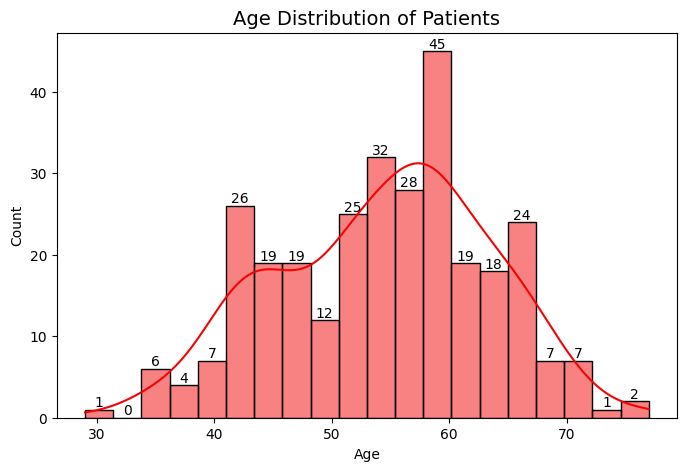

In [192]:
plt.figure(figsize=(8,5))
ax = sb.histplot(heart['age'], kde=True, bins=20, color="#F30404")
ax.bar_label(ax.containers[0])
plt.title("Age Distribution of Patients", fontsize=14)
plt.xticks(range(30,80,10))
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


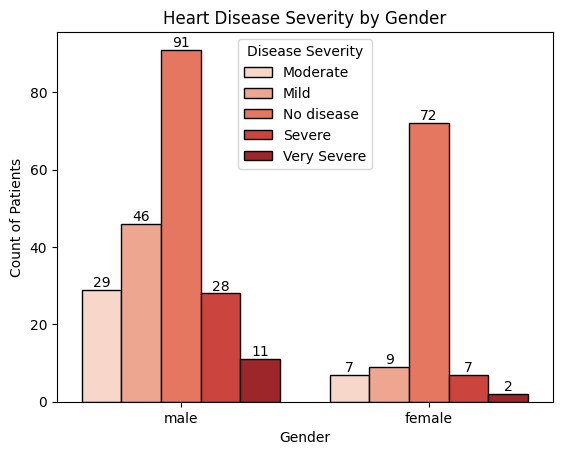

In [193]:
ax = sb.countplot(heart, x = 'gender', hue='disease_severity',palette="Reds", edgecolor = 'black', linewidth = 1)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Gender")
plt.ylabel("Count of Patients")
plt.title("Heart Disease Severity by Gender")
plt.legend(title="Disease Severity")
plt.show()

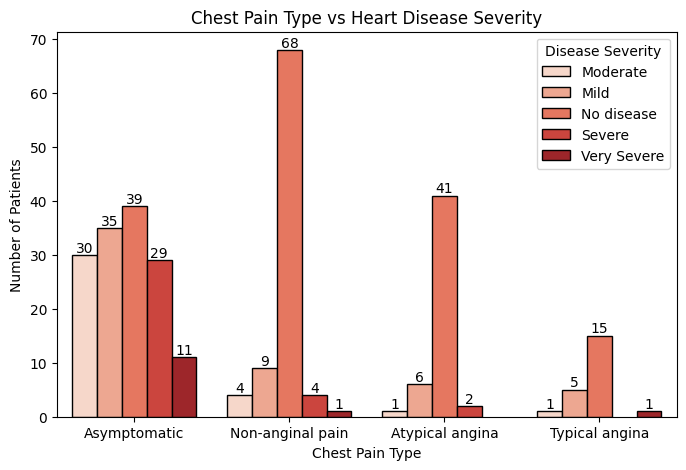

In [194]:
plt.figure(figsize=(8,5))
ax = sb.countplot(data=heart, x='chest_pain_type', hue='disease_severity', palette="Reds", edgecolor = 'black', linewidth = 1)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Chest Pain Type")
plt.ylabel("Number of Patients")
plt.title("Chest Pain Type vs Heart Disease Severity")
plt.legend(title="Disease Severity")
plt.show()


C:\Users\udayk\AppData\Local\Temp\ipykernel_99204\2128101314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data=heart, x='disease_severity', y='cholesterol', palette="Reds")


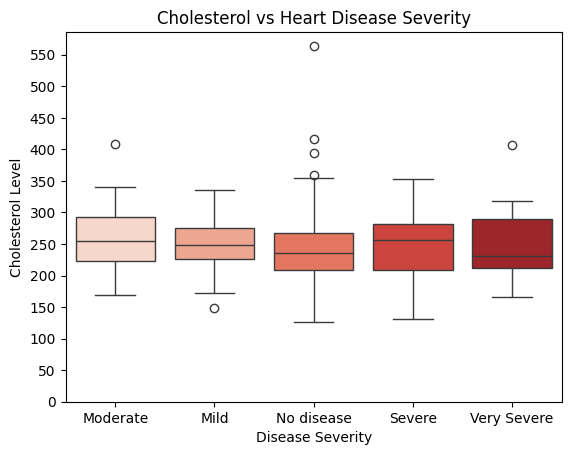

In [195]:
#plt.figure(figsize=(8,5))
sb.boxplot(data=heart, x='disease_severity', y='cholesterol', palette="Reds")
plt.xlabel("Disease Severity")
plt.ylabel("Cholesterol Level")
plt.yticks(range(0,600,50))
plt.title("Cholesterol vs Heart Disease Severity")
plt.show()

In [196]:
heart.head(2)

,age,age_category,gender,chest_pain_type,resting_bp,bp_category,cholesterol,chol_category,cholesterol_ratio,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_depression_cat,st_slope,num_major_vessels,thalassemia,disease_severity
0,67,aged,male,Asymptomatic,160,HTN-2,286,High,4.27,<120,LV hypertrophy,108,Yes,1.5,Moderate,Flat,3,Normal,Moderate
1,67,aged,male,Asymptomatic,120,Elevated,229,Modrate,3.42,<120,LV hypertrophy,129,Yes,2.6,Severe,Flat,2,Reversible defect,Mild


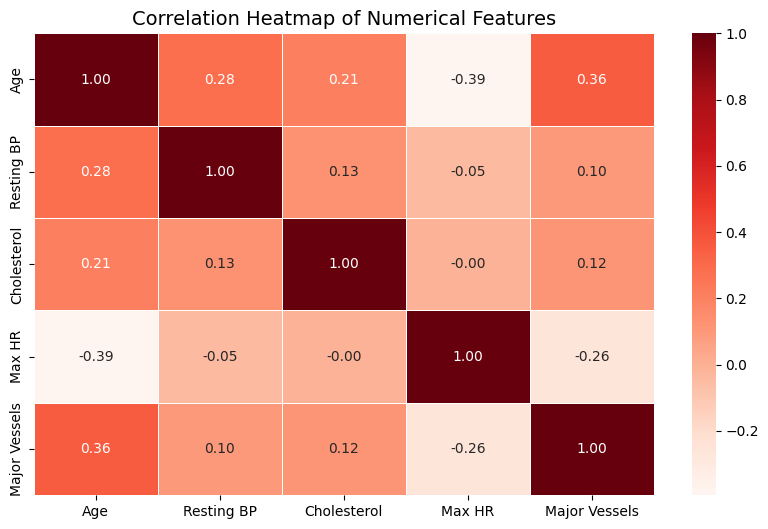

In [197]:
label_map = {
    "age": "Age",
    "resting_bp": "Resting BP",
    "cholesterol": "Cholesterol",
    "max_heart_rate": "Max HR",
    "num_major_vessels": "Major Vessels",
}
num_cols = heart.select_dtypes(include='int64').columns
corr = heart[num_cols].corr()
corr = corr.rename(index=label_map, columns=label_map)
plt.figure(figsize=(10,6))
sb.heatmap(corr, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()


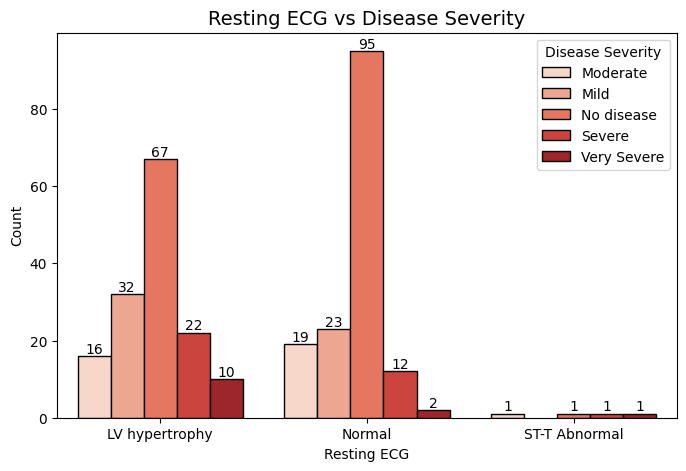

In [198]:
plt.figure(figsize=(8,5))
ax =sb.countplot(x="rest_ecg", hue="disease_severity", data=heart, palette="Reds", edgecolor = 'black', linewidth = 1)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Resting ECG vs Disease Severity", fontsize=14)
plt.xlabel("Resting ECG")
plt.ylabel("Count")
plt.legend(title="Disease Severity")
plt.show()


C:\Users\udayk\AppData\Local\Temp\ipykernel_99204\1633250511.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="disease_severity", y="max_heart_rate", data=heart, palette="Reds")


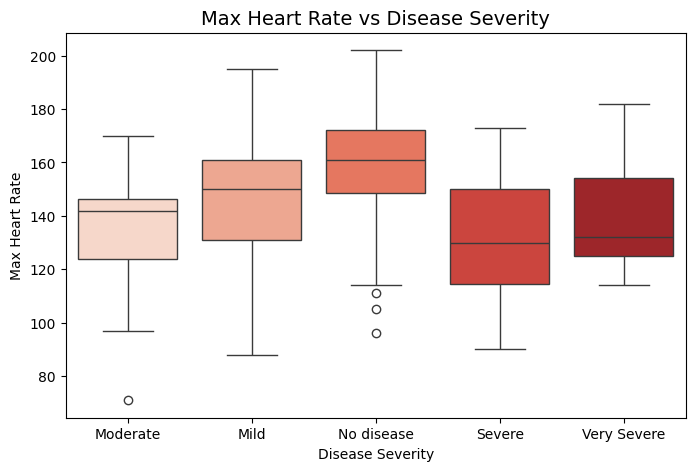

In [199]:
plt.figure(figsize=(8,5))
sb.boxplot(x="disease_severity", y="max_heart_rate", data=heart, palette="Reds")
plt.title("Max Heart Rate vs Disease Severity", fontsize=14)
plt.xlabel("Disease Severity")
plt.ylabel("Max Heart Rate")
plt.show()


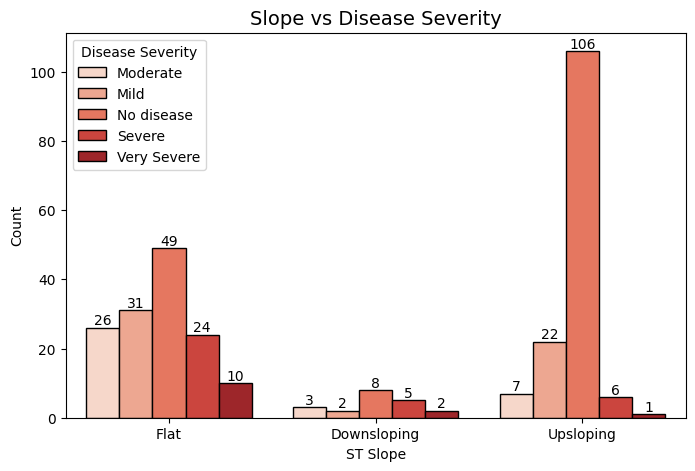

In [200]:
plt.figure(figsize=(8,5))
ax = sb.countplot(x="st_slope", hue="disease_severity", data=heart, palette="Reds", edgecolor = 'black', linewidth = 1)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Slope vs Disease Severity", fontsize=14)
plt.xlabel("ST Slope")
plt.ylabel("Count")
plt.legend(title="Disease Severity")
plt.show()


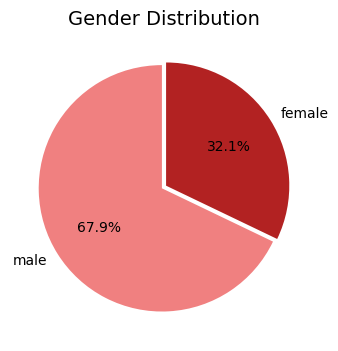

In [201]:
gender_counts = heart['gender'].value_counts()
plt.figure(figsize=(5,4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=["lightcoral","firebrick"], startangle=90, explode=[0.02, 0.02])
plt.title("Gender Distribution", fontsize=14)
plt.show()


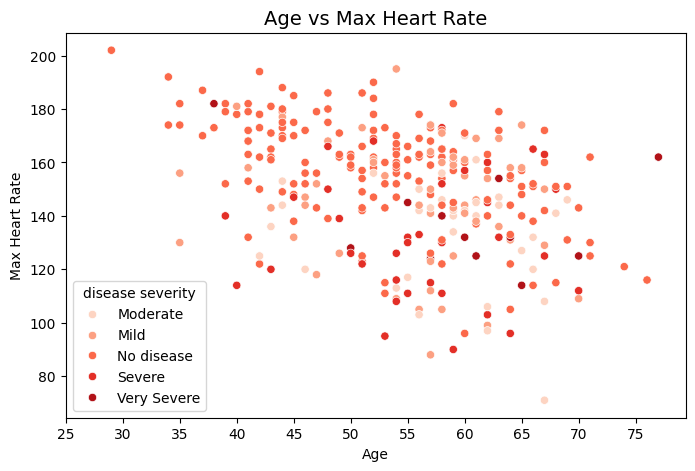

In [202]:
plt.figure(figsize=(8,5))
sb.scatterplot(x="age", y="max_heart_rate", hue="disease_severity", 
               data=heart, palette="Reds")
plt.title("Age vs Max Heart Rate", fontsize=14)
plt.xlabel("Age")
plt.xticks(range(25,80,5))
plt.ylabel("Max Heart Rate")
plt.legend(title = 'disease severity')
plt.show()


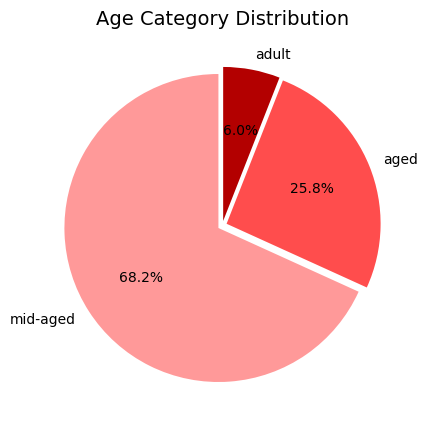

In [203]:

age_counts = heart['age_category'].value_counts()
age_counts = age_counts[age_counts > 0]  


plt.figure(figsize=(6,5))
plt.pie(age_counts,
        labels=age_counts.index,
        autopct='%1.1f%%',
        colors=["#ff9999","#ff4d4d","#b30000"], 
        startangle=90, explode=[0.03,0.03,0.03])
plt.title("Age Category Distribution", fontsize=14)
plt.show()


In [204]:
heart.head(2)

,age,age_category,gender,chest_pain_type,resting_bp,bp_category,cholesterol,chol_category,cholesterol_ratio,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_depression_cat,st_slope,num_major_vessels,thalassemia,disease_severity
0,67,aged,male,Asymptomatic,160,HTN-2,286,High,4.27,<120,LV hypertrophy,108,Yes,1.5,Moderate,Flat,3,Normal,Moderate
1,67,aged,male,Asymptomatic,120,Elevated,229,Modrate,3.42,<120,LV hypertrophy,129,Yes,2.6,Severe,Flat,2,Reversible defect,Mild


C:\Users\udayk\AppData\Local\Temp\ipykernel_99204\3114112179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(x='bp_category', data=heart, palette="Reds", edgecolor = 'black', linewidth = 1)


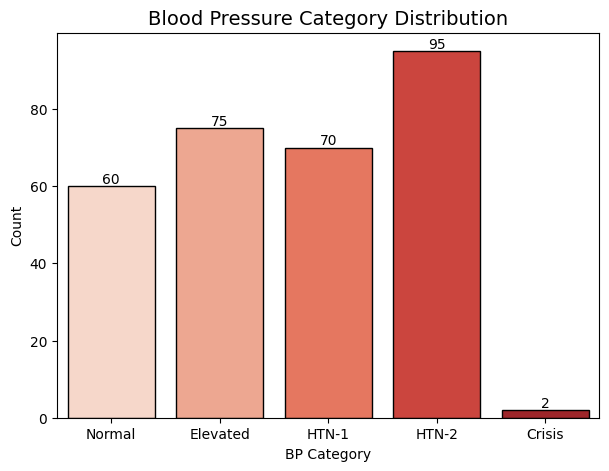

In [205]:
plt.figure(figsize=(7,5))
ax = sb.countplot(x='bp_category', data=heart, palette="Reds", edgecolor = 'black', linewidth = 1)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Blood Pressure Category Distribution", fontsize=14)
plt.xlabel("BP Category")
plt.ylabel("Count")
plt.show()


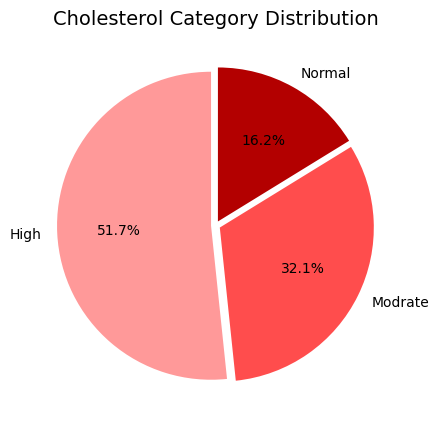

In [206]:

chol_counts = heart['chol_category'].value_counts()


plt.figure(figsize=(6,5))
plt.pie(chol_counts,
        labels=chol_counts.index,
        autopct='%1.1f%%',
        colors=["#ff9999","#ff4d4d","#b30000"], 
        startangle=90, explode=[0.03,0.03,0.03]) 

plt.title("Cholesterol Category Distribution", fontsize=14)
plt.show()


C:\Users\udayk\AppData\Local\Temp\ipykernel_99204\4069150354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='disease_severity', y='cholesterol_ratio', data=heart, palette="Reds")


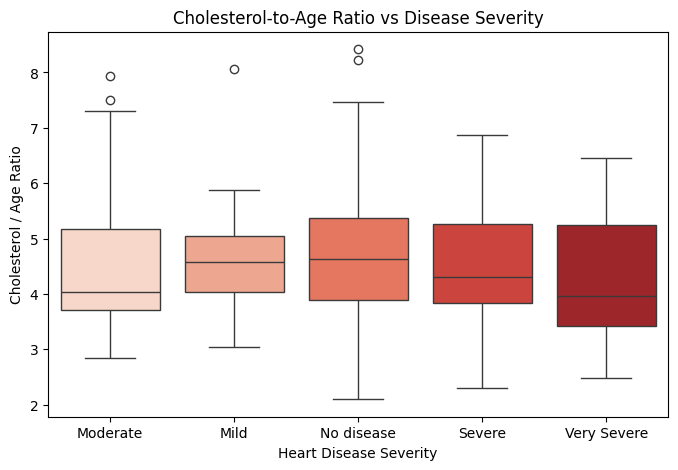

In [207]:
plt.figure(figsize=(8,5))
sb.boxplot(x='disease_severity', y='cholesterol_ratio', data=heart, palette="Reds")
plt.title('Cholesterol-to-Age Ratio vs Disease Severity')
plt.xlabel('Heart Disease Severity')
plt.ylabel('Cholesterol / Age Ratio')
plt.show()

<Figure size 700x600 with 0 Axes>

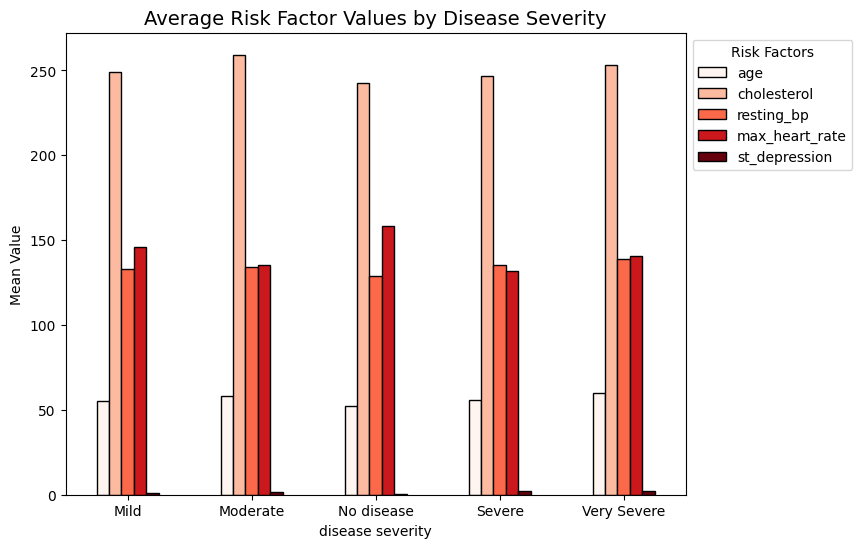

In [212]:
plt.figure(figsize=(7,6))
risk_factors = ["age","cholesterol","resting_bp","max_heart_rate","st_depression"]
risk_means = heart.groupby("disease_severity")[risk_factors].mean()
risk_means.plot(kind="bar", figsize=(8,6), colormap="Reds", edgecolor = 'black', linewidth = 1 )
plt.title("Average Risk Factor Values by Disease Severity", fontsize=14)
plt.legend(title="Risk Factors", bbox_to_anchor=(1, 1), loc="upper left")
plt.ylabel("Mean Value")
plt.xlabel("disease severity")
plt.xticks(rotation=0)
plt.show()

In [209]:
heart['has_disease'] = heart['disease_severity'].apply(lambda x: 0 if x=='No disease' else 1)


C:\Users\udayk\AppData\Local\Temp\ipykernel_99204\750670668.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=gender_disease.index, y=gender_disease.values, palette=["#ff4d4d","#b30000"])


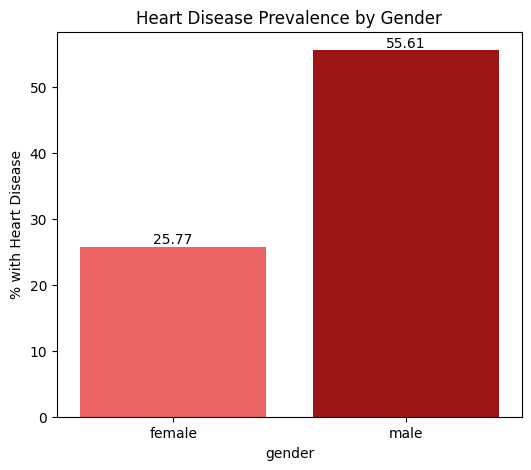

In [210]:
gender_disease = heart.groupby('gender')['has_disease'].mean().round(4) * 100
plt.figure(figsize=(6,5))
ax = sb.barplot(x=gender_disease.index, y=gender_disease.values, palette=["#ff4d4d","#b30000"])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.ylabel("% with Heart Disease")
plt.title("Heart Disease Prevalence by Gender")
plt.show()
